In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time

In [2]:
TP395 = pd.read_csv('./csv/Topix395.csv')
data =pd.DataFrame(TP395)
data

,code
0,4004
1,4005
2,4021
3,4042
4,4043
...,...
390,9861
391,9962
392,9983
393,9984


In [3]:
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

In [4]:
'''終値　毎日変わる'''
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period="max").Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完

print(closes)

yfinance.Ticker object <4004.T> 2.2376232147216797
yfinance.Ticker object <4005.T> 0.43675947189331055
yfinance.Ticker object <4021.T> 0.5610008239746094
yfinance.Ticker object <4042.T> 0.42502260208129883
yfinance.Ticker object <4043.T> 0.5379753112792969
yfinance.Ticker object <4044.T> 0.5576441287994385
yfinance.Ticker object <4045.T> 0.5348482131958008
yfinance.Ticker object <4061.T> 0.5679981708526611
yfinance.Ticker object <4062.T> 0.5470812320709229
yfinance.Ticker object <4063.T> 0.5530242919921875
yfinance.Ticker object <4088.T> 0.44905996322631836
yfinance.Ticker object <4091.T> 0.5879607200622559
yfinance.Ticker object <4095.T> 0.39454030990600586
yfinance.Ticker object <4114.T> 0.5579469203948975
yfinance.Ticker object <4118.T> 0.5390274524688721
yfinance.Ticker object <4151.T> 0.587315559387207
yfinance.Ticker object <4182.T> 0.45823192596435547
yfinance.Ticker object <4183.T> 0.5707433223724365
yfinance.Ticker object <4185.T> 0.5632476806640625
yfinance.Ticker object <418

yfinance.Ticker object <6723.T> 0.5131485462188721
yfinance.Ticker object <6724.T> 0.5813026428222656
yfinance.Ticker object <6728.T> 0.539907693862915
yfinance.Ticker object <6752.T> 0.4722142219543457
yfinance.Ticker object <6753.T> 0.5770001411437988
yfinance.Ticker object <6754.T> 0.5714991092681885
yfinance.Ticker object <6755.T> 0.5507383346557617
yfinance.Ticker object <6758.T> 0.5149259567260742
yfinance.Ticker object <6762.T> 0.5620458126068115
yfinance.Ticker object <6770.T> 0.6381435394287109
yfinance.Ticker object <6806.T> 0.663909912109375
yfinance.Ticker object <6841.T> 0.5148193836212158
yfinance.Ticker object <6845.T> 0.4569976329803467
yfinance.Ticker object <6849.T> 0.576000452041626
yfinance.Ticker object <6856.T> 0.5616116523742676
yfinance.Ticker object <6857.T> 0.45497703552246094
yfinance.Ticker object <6861.T> 0.5707266330718994
yfinance.Ticker object <6869.T> 0.47958993911743164
yfinance.Ticker object <6902.T> 0.32509303092956543
yfinance.Ticker object <6920.T>

yfinance.Ticker object <8876.T> 0.4387211799621582
yfinance.Ticker object <8905.T> 0.5310018062591553
yfinance.Ticker object <9001.T> 0.5643272399902344
yfinance.Ticker object <9003.T> 0.42342472076416016
yfinance.Ticker object <9005.T> 0.5414478778839111
yfinance.Ticker object <9006.T> 0.5382466316223145
yfinance.Ticker object <9007.T> 0.5519900321960449
yfinance.Ticker object <9008.T> 0.5586307048797607
yfinance.Ticker object <9009.T> 0.5466837882995605
yfinance.Ticker object <9020.T> 0.29861927032470703
yfinance.Ticker object <9021.T> 0.44302964210510254
yfinance.Ticker object <9022.T> 0.5830345153808594
yfinance.Ticker object <9024.T> 0.3379991054534912
yfinance.Ticker object <9031.T> 0.5808932781219482
yfinance.Ticker object <9041.T> 0.5370016098022461
yfinance.Ticker object <9042.T> 0.5490260124206543
yfinance.Ticker object <9044.T> 0.38097643852233887
yfinance.Ticker object <9045.T> 0.5269997119903564
yfinance.Ticker object <9048.T> 0.46831750869750977
yfinance.Ticker object <90

In [4]:
#closes.to_csv('./csv/closes20201113max_395N.csv')
closes= pd.read_csv('./csv/closes20201113max_395N.csv')
closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)
closes

,4004.T,4005.T,4021.T,4042.T,4043.T,4044.T,4045.T,4061.T,4062.T,4063.T,...,9783.T,9831.T,9832.T,9843.T,9861.T,9962.T,9983.T,9984.T,9987.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
1965-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257.719971
1965-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1263.989990
1965-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1274.270020
1965-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1286.430054
1965-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1288.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09,1889.0,372.0,5970.0,1730.0,2287.0,2242.0,1131.0,3295.0,4440.0,15100.0,...,2534.0,507.0,1345.0,22380.0,1959.0,3360.0,78310.0,7083.0,3770.0,24839.839844
2020-11-10,1983.0,389.0,5910.0,1717.0,2338.0,2259.0,1157.0,3195.0,4155.0,15180.0,...,2623.0,498.0,1368.0,20960.0,2003.0,3430.0,76840.0,6748.0,3880.0,24905.589844
2020-11-11,1970.0,391.0,6070.0,1728.0,2376.0,2339.0,1180.0,3300.0,4205.0,15160.0,...,2600.0,497.0,1347.0,20955.0,2027.0,3470.0,79150.0,6581.0,3880.0,25349.599609


In [15]:
'''
earnings = pd.read_csv('./csv/earnings_396Nbu.csv')
earnings.rename(columns ={'Unnamed: 0_x':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)
earnings.to_csv('./csv/earnings_396N.csv')'''

In [5]:
earnings = [] # 当期純利益（決算時変動）

dummy = tickers.tickers[0].financials.T["Net Income"]
dummy[:] = np.nan

for i in range(len(tickers.tickers)):
    start = time.time()
    try:
        earnings.append(tickers.tickers[i].financials.T["Net Income"])
        t = time.time() - start
        print(tickers.tickers[i],t)
    except:
        earnings.append(dummy)       # エラー発生時はダミーを入れる

earnings = pd.DataFrame(earnings).T  # DataFrame化
earnings.columns = stocks            # カラム名の設定

print(earnings)

yfinance.Ticker object <4004.T> 0.00099945068359375
yfinance.Ticker object <4005.T> 2.486964702606201
yfinance.Ticker object <4021.T> 2.686781406402588
yfinance.Ticker object <4042.T> 2.429612636566162
yfinance.Ticker object <4043.T> 2.7340195178985596
yfinance.Ticker object <4044.T> 2.605142116546631
yfinance.Ticker object <4045.T> 2.4299533367156982
yfinance.Ticker object <4061.T> 2.6264986991882324
yfinance.Ticker object <4062.T> 2.5362398624420166
yfinance.Ticker object <4063.T> 2.327061176300049
yfinance.Ticker object <4088.T> 3.018739700317383
yfinance.Ticker object <4091.T> 2.7797868251800537
yfinance.Ticker object <4095.T> 2.4204485416412354
yfinance.Ticker object <4114.T> 2.5790557861328125
yfinance.Ticker object <4118.T> 2.5830202102661133
yfinance.Ticker object <4151.T> 2.4692697525024414
yfinance.Ticker object <4182.T> 2.8271007537841797
yfinance.Ticker object <4185.T> 2.3850932121276855
yfinance.Ticker object <4186.T> 2.3271663188934326
yfinance.Ticker object <4188.T> 2.60

yfinance.Ticker object <6753.T> 5.935816049575806
yfinance.Ticker object <6754.T> 6.908887624740601
yfinance.Ticker object <6755.T> 6.394960880279541
yfinance.Ticker object <6758.T> 6.55058217048645
yfinance.Ticker object <6762.T> 5.756849765777588
yfinance.Ticker object <6770.T> 6.094390153884888
yfinance.Ticker object <6806.T> 6.616981744766235
yfinance.Ticker object <6841.T> 5.851407051086426
yfinance.Ticker object <6845.T> 6.161799192428589
yfinance.Ticker object <6849.T> 5.967097759246826
yfinance.Ticker object <6856.T> 6.316096305847168
yfinance.Ticker object <6857.T> 5.991049528121948
yfinance.Ticker object <6861.T> 6.6833882331848145
yfinance.Ticker object <6869.T> 6.307387351989746
yfinance.Ticker object <6902.T> 6.339864015579224
yfinance.Ticker object <6920.T> 6.61928653717041
yfinance.Ticker object <6923.T> 6.438350439071655
yfinance.Ticker object <6925.T> 6.350666522979736
yfinance.Ticker object <6952.T> 5.395960092544556
yfinance.Ticker object <6954.T> 5.917503356933594
y

yfinance.Ticker object <9020.T> 6.405322551727295
yfinance.Ticker object <9021.T> 6.424166440963745
yfinance.Ticker object <9022.T> 5.981595993041992
yfinance.Ticker object <9024.T> 6.367430925369263
yfinance.Ticker object <9031.T> 6.064284563064575
yfinance.Ticker object <9041.T> 6.362448453903198
yfinance.Ticker object <9042.T> 5.674903631210327
yfinance.Ticker object <9044.T> 6.618641138076782
yfinance.Ticker object <9045.T> 6.6407787799835205
yfinance.Ticker object <9048.T> 6.150706768035889
yfinance.Ticker object <9062.T> 6.346413850784302
yfinance.Ticker object <9064.T> 6.538813352584839
yfinance.Ticker object <9065.T> 7.008455514907837
yfinance.Ticker object <9072.T> 7.034968137741089
yfinance.Ticker object <9076.T> 6.297047138214111
yfinance.Ticker object <9101.T> 5.345704078674316
yfinance.Ticker object <9104.T> 6.156682968139648
yfinance.Ticker object <9142.T> 6.146503686904907
yfinance.Ticker object <9143.T> 6.187412261962891
yfinance.Ticker object <9201.T> 6.149013757705688

In [12]:
#earnings.to_csv('./csv/earnings_395N.csv')

In [13]:
earnings = pd.read_csv('./csv/earnings_395N.csv')

earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)
print(earnings)

                  4004.T        4005.T        4021.T        4042.T  \
Date                                                                 
2006-08-31           NaN           NaN           NaN           NaN   
2007-08-31           NaN           NaN           NaN           NaN   
2009-03-31           NaN           NaN           NaN           NaN   
2010-03-31           NaN           NaN           NaN           NaN   
2011-03-31           NaN           NaN           NaN           NaN   
2012-03-31           NaN           NaN           NaN           NaN   
2016-10-31           NaN           NaN           NaN           NaN   
2016-11-30           NaN           NaN           NaN           NaN   
2016-12-31  1.230500e+10           NaN           NaN           NaN   
2017-01-31           NaN           NaN           NaN           NaN   
2017-02-20           NaN           NaN           NaN           NaN   
2017-02-28           NaN           NaN           NaN           NaN   
2017-03-20          

In [23]:
'''equity   = [] # 自己資本（決算時変動）

dummy = tickers.tickers[0].balance_sheet.T["Total Stockholder Equity"]
dummy[:] = np.nan

for i in range(len(tickers.tickers)):
    start = time.time()
    try:
        equity.append(tickers.tickers[i].balance_sheet.T["Total Stockholder Equity"])
        t = time.time() - start
        print(tickers.tickers[i],t)
    except:
        equity.append(dummy)         # エラー発生時はダミーを入れる

equity = pd.DataFrame(equity).T      # DataFrame化
equity.columns = stocks              # カラム名の設定

print(equity)'''

yfinance.Ticker object <4004.T> 0.0
yfinance.Ticker object <4005.T> 2.5701863765716553
yfinance.Ticker object <4021.T> 2.99074649810791
yfinance.Ticker object <4042.T> 2.5387823581695557
yfinance.Ticker object <4043.T> 2.754281759262085
yfinance.Ticker object <4044.T> 2.4276700019836426
yfinance.Ticker object <4045.T> 2.3340444564819336
yfinance.Ticker object <4061.T> 2.7594008445739746
yfinance.Ticker object <4062.T> 2.2786142826080322
yfinance.Ticker object <4063.T> 2.6875553131103516
yfinance.Ticker object <4088.T> 2.6260228157043457
yfinance.Ticker object <4091.T> 2.5632238388061523
yfinance.Ticker object <4095.T> 2.4624314308166504
yfinance.Ticker object <4114.T> 2.51501202583313
yfinance.Ticker object <4118.T> 2.468440294265747
yfinance.Ticker object <4151.T> 2.69026255607605
yfinance.Ticker object <4182.T> 2.266566276550293
yfinance.Ticker object <4185.T> 2.4374582767486572
yfinance.Ticker object <4186.T> 2.4175329208374023
yfinance.Ticker object <4188.T> 2.6638312339782715
yfin

yfinance.Ticker object <6753.T> 6.902655839920044
yfinance.Ticker object <6754.T> 6.352234601974487
yfinance.Ticker object <6755.T> 5.721547603607178
yfinance.Ticker object <6758.T> 6.393912076950073
yfinance.Ticker object <6762.T> 5.454874753952026
yfinance.Ticker object <6770.T> 5.64867377281189
yfinance.Ticker object <6806.T> 6.246456623077393
yfinance.Ticker object <6841.T> 5.950608968734741
yfinance.Ticker object <6845.T> 6.395673036575317
yfinance.Ticker object <6849.T> 7.2183427810668945
yfinance.Ticker object <6856.T> 6.205091714859009
yfinance.Ticker object <6857.T> 6.769745588302612
yfinance.Ticker object <6861.T> 6.516127586364746
yfinance.Ticker object <6869.T> 6.784497261047363
yfinance.Ticker object <6902.T> 6.519732475280762
yfinance.Ticker object <6920.T> 6.689553499221802
yfinance.Ticker object <6923.T> 6.235738515853882
yfinance.Ticker object <6925.T> 6.031545400619507
yfinance.Ticker object <6952.T> 5.35045862197876
yfinance.Ticker object <6954.T> 6.382363319396973
y

yfinance.Ticker object <9020.T> 6.804479122161865
yfinance.Ticker object <9021.T> 5.868829011917114
yfinance.Ticker object <9022.T> 6.097927808761597
yfinance.Ticker object <9024.T> 6.0664143562316895
yfinance.Ticker object <9031.T> 6.1287384033203125
yfinance.Ticker object <9041.T> 5.819255113601685
yfinance.Ticker object <9042.T> 6.185909986495972
yfinance.Ticker object <9044.T> 6.3834943771362305
yfinance.Ticker object <9045.T> 6.339083194732666
yfinance.Ticker object <9048.T> 6.108614444732666
yfinance.Ticker object <9062.T> 6.171160697937012
yfinance.Ticker object <9064.T> 6.710525035858154
yfinance.Ticker object <9065.T> 6.028864622116089
yfinance.Ticker object <9072.T> 6.2147605419158936
yfinance.Ticker object <9076.T> 6.55658745765686
yfinance.Ticker object <9101.T> 6.43497109413147
yfinance.Ticker object <9104.T> 5.783950567245483
yfinance.Ticker object <9142.T> 6.173526287078857
yfinance.Ticker object <9143.T> 6.3623926639556885
yfinance.Ticker object <9201.T> 6.3793048858642

In [39]:
'''shares   = [] # 発行株数

for i in range(len(tickers.tickers)):
    start = time.time()
    try:
        shares.append(tickers.tickers[i].info["sharesOutstanding"])
        t = time.time() - start
        print(tickers.tickers[i],t)
    except:
        shares.append(np.nan)        # エラー発生時はNAN値を入れる

shares = pd.Series(shares)           # Series化
shares.index = stocks                # インデックス名の設定

print(shares)'''

yfinance.Ticker object <4004.T> 0.0
yfinance.Ticker object <4005.T> 0.0
yfinance.Ticker object <4021.T> 0.0
yfinance.Ticker object <4042.T> 0.0
yfinance.Ticker object <4043.T> 0.0
yfinance.Ticker object <4044.T> 0.0
yfinance.Ticker object <4045.T> 0.0
yfinance.Ticker object <4061.T> 0.0
yfinance.Ticker object <4062.T> 0.0
yfinance.Ticker object <4063.T> 0.0
yfinance.Ticker object <4088.T> 0.0
yfinance.Ticker object <4091.T> 0.0
yfinance.Ticker object <4095.T> 0.0
yfinance.Ticker object <4114.T> 0.0
yfinance.Ticker object <4118.T> 0.0
yfinance.Ticker object <4151.T> 0.0
yfinance.Ticker object <4182.T> 0.0
yfinance.Ticker object <4185.T> 0.0
yfinance.Ticker object <4186.T> 0.0
yfinance.Ticker object <4188.T> 0.0
yfinance.Ticker object <4202.T> 0.0
yfinance.Ticker object <4203.T> 0.0
yfinance.Ticker object <4204.T> 0.0
yfinance.Ticker object <4205.T> 0.0
yfinance.Ticker object <4206.T> 0.0
yfinance.Ticker object <4208.T> 0.0
yfinance.Ticker object <4272.T> 0.0
yfinance.Ticker object <4307

yfinance.Ticker object <8304.T> 0.0
yfinance.Ticker object <8306.T> 0.0
yfinance.Ticker object <8308.T> 0.0
yfinance.Ticker object <8309.T> 0.0
yfinance.Ticker object <8316.T> 0.0
yfinance.Ticker object <8331.T> 0.0
yfinance.Ticker object <8334.T> 0.0
yfinance.Ticker object <8341.T> 0.0
yfinance.Ticker object <8354.T> 0.0
yfinance.Ticker object <8355.T> 0.0
yfinance.Ticker object <8358.T> 0.0
yfinance.Ticker object <8359.T> 0.0
yfinance.Ticker object <8366.T> 0.0
yfinance.Ticker object <8369.T> 0.0
yfinance.Ticker object <8377.T> 0.0
yfinance.Ticker object <8382.T> 0.0
yfinance.Ticker object <8385.T> 0.0
yfinance.Ticker object <8410.T> 0.0
yfinance.Ticker object <8411.T> 0.0
yfinance.Ticker object <8418.T> 0.0
yfinance.Ticker object <8439.T> 0.0
yfinance.Ticker object <8473.T> 0.0
yfinance.Ticker object <8570.T> 0.0
yfinance.Ticker object <8572.T> 0.0
yfinance.Ticker object <8586.T> 0.0
yfinance.Ticker object <8591.T> 0.0
yfinance.Ticker object <8593.T> 0.0
yfinance.Ticker object <8595

In [40]:
#shares.to_csv('./csv/shares_395N.csv')
#equity.to_csv('./csv/equity_395N.csv')

Date,2016-12-31,2017-01-31,2017-02-28,2017-03-20,2017-03-31,2017-06-30,2017-08-31,2017-09-30,2017-12-31,2018-01-31,...,2019-06-30,2019-08-31,2019-09-30,2019-12-31,2020-02-29,2020-03-20,2020-03-31,2020-06-30,2020-08-31,2020-09-30
4004.T,1.230500e+10,NaN,NaN,3.347000e+10,NaN,NaN,1.115030e+11,NaN,NaN,7.308800e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005.T,NaN,NaN,8.548200e+10,NaN,NaN,1.337680e+11,NaN,NaN,1.179920e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4021.T,NaN,NaN,2.402600e+10,NaN,NaN,2.714200e+10,NaN,NaN,2.937200e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4042.T,NaN,NaN,7.566400e+10,NaN,NaN,8.879500e+10,NaN,NaN,7.813300e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4043.T,NaN,NaN,5.216500e+10,NaN,NaN,1.969800e+10,NaN,NaN,3.427900e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962.T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9983.T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9984.T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9987.T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
shares= pd.read_csv('./csv/shares_395N.csv') 
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']


equity=pd.read_csv('./csv/equity_395N.csv')

equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

In [16]:
equity

,4004.T,4005.T,4021.T,4042.T,4043.T,4044.T,4045.T,4061.T,4062.T,4063.T,...,9783.T,9831.T,9832.T,9843.T,9861.T,9962.T,9983.T,9984.T,9987.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2006-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,1.679890e+11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:

eps = earnings/shares.values      # EPS
roe = earnings/equity             # ROE

eps = eps.ffill()                 # 欠損データの補完
roe = roe.ffill()

eps = eps.drop(["^N225"], axis=1) # ^N225カラムは削除しておく
roe = roe.drop(["^N225"], axis=1)


print(eps)
print(roe)

                4004.T     4005.T      4021.T      4042.T      4043.T  \
Date                                                                    
2006-08-31         NaN        NaN         NaN         NaN         NaN   
2007-08-31         NaN        NaN         NaN         NaN         NaN   
2009-03-31         NaN        NaN         NaN         NaN         NaN   
2010-03-31         NaN        NaN         NaN         NaN         NaN   
2011-03-31         NaN        NaN         NaN         NaN         NaN   
2012-03-31         NaN        NaN         NaN         NaN         NaN   
2016-10-31         NaN        NaN         NaN         NaN         NaN   
2016-11-30         NaN        NaN         NaN         NaN         NaN   
2016-12-31   84.353037        NaN         NaN         NaN         NaN   
2017-01-31   84.353037        NaN         NaN         NaN         NaN   
2017-02-20   84.353037        NaN         NaN         NaN         NaN   
2017-02-28   84.353037        NaN         NaN      

In [18]:
#eps.to_csv('./csv/eps_395.csv')
#roe.to_csv('./csv/roe_395.csv')

In [19]:
eps=pd.read_csv('./csv/eps_395.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/roe_395.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)

In [22]:
closes["month"] = closes.index.month                              # 月カラムの作成
closes["end_of_month"] = closes.month.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_month != 0]                         # 月末のみ抽出

monthly_rt = closes.pct_change().shift(-1)                        # 月次リターンの作成(ラグあり)
monthly_rt = monthly_rt.sub(monthly_rt["^N225"], axis=0)          # マーケットリターン控除

closes = closes[closes.index > datetime.datetime(2017, 4, 1)]     # 2017年4月以降
monthly_rt = monthly_rt[monthly_rt.index > datetime.datetime(2017, 4, 1)]

closes = closes.drop(["^N225", "month", "end_of_month"], axis=1)  # 不要なカラムを削除
monthly_rt = monthly_rt.drop(["^N225", "month", "end_of_month"], axis=1)

print(closes)
print(monthly_rt)

                 4004.T      4005.T       4021.T       4042.T       4043.T  \
Date                                                                         
2017-04-28  1874.224854  607.501221  3251.283936  2061.354248  2562.175049   
2017-05-31  1922.113159  558.244324  3655.929932  1852.659302  2286.822510   
2017-06-30  2326.533203  623.920166  3491.248779  2266.111328  2524.839355   
2017-07-31  2576.506592  625.851807  3458.312012  2588.997803  2347.493652   
2017-08-31  2607.752686  636.475830  3467.722656  2539.777344  2268.154785   
2017-09-29  3129.124756  678.971924  3756.522705  2496.463379  2495.141357   
2017-10-31  3370.170410  766.861633  3998.419678  2399.991211  3002.977539   
2017-11-30  3718.347168  755.271790  4268.775879  2440.351807  3218.479980   
2017-12-29  4343.233398  782.314758  4264.032715  2514.182617  3438.666992   
2018-01-31  4555.208496  772.656555  4216.602051  2461.024414  3241.903809   
2018-02-28  4798.754395  646.134033  4041.107910  2214.922119  3

In [23]:
#closes.to_csv('./csv/closes_395_20201113.csv')
#monthly_rt.to_csv('./csv/monthly_rt_395_20201113.csv')

In [24]:
closes=pd.read_csv('./csv/closes_395_20201113.csv')
closes.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

monthly_rt=pd.read_csv('./csv/monthly_rt_395_20201113.csv')
monthly_rt.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
monthly_rt['Date'] = pd.to_datetime(monthly_rt['Date'])
monthly_rt.set_index('Date',inplace=True)

In [27]:
eps_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=monthly_rt.index, columns=monthly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

print(per_df)
print(roe_df)

             4004.T   4005.T   4021.T   4042.T   4043.T   4044.T   4045.T  \
Date                                                                        
2017-04-28  22.2188  11.6196  19.5285  8.66854  3.41147  8.27963  11.5859   
2017-05-31  22.7865  10.6774   21.959  7.79092  3.04485  7.74713  11.0106   
2017-06-30  27.5809  11.9336  20.9699  9.52959  3.36176  8.29681  13.0386   
2017-07-31  30.5443  11.9706   20.772  10.8874  3.12563  8.33117  11.9223   
2017-08-31  30.9147  12.1738  20.8286  10.6804  3.01999  7.93608   12.351   
2017-09-29  37.0956  12.9866  22.5632  10.4983  3.32222  8.44105  13.4584   
2017-10-31  39.9532  14.6676  24.0161  10.0926  3.99839  8.69924  13.0922   
2017-11-30  44.0808   14.446    25.64  10.2623  4.28533  8.58908  12.8868   
2017-12-29  51.4888  14.9632  25.6115  10.5728   4.5785  8.24827  12.9306   
2018-01-31  19.8533  14.7785  25.3266  10.3493  4.31651  8.39974  13.5715   
2018-02-28  20.9148  12.3585  24.2725  9.31433   4.0171  8.26548  12.0689   

In [28]:
#per_df.to_csv('./csv/per_df_395_20201113.csv')
#roe_df.to_csv('./csv/roe_df_395_20201113.csv')

In [29]:
per_df=pd.read_csv('./csv/per_df_395_20201113.csv')
per_df.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
per_df['Date'] = pd.to_datetime(per_df['Date'])
per_df.set_index('Date',inplace=True)

roe_df=pd.read_csv('./csv/roe_df_395_20201113.csv')
roe_df.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe_df['Date'] = pd.to_datetime(roe_df['Date'])
roe_df.set_index('Date',inplace=True)

In [33]:
stack_monthly_rt = monthly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_monthly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]                                      # カラム名の設定

df["rt"][df.rt > 1.0] = np.nan                                         # 異常値の除去

print(df)

                         rt         per       roe
Date                                             
2017-04-28 4004.T  0.001910   22.218819       NaN
           4005.T -0.104722   11.619575  0.104206
           4021.T  0.100816   19.528543  0.148272
           4042.T -0.124883    8.668536  0.182994
           4043.T -0.131109    3.411472  0.410700
...                     ...         ...       ...
2020-11-13 9861.T       NaN  181.871075  0.014917
           9962.T       NaN   56.253548  0.078191
           9983.T       NaN   94.256131  0.094460
           9984.T       NaN  -12.892606 -0.162604
           9987.T       NaN   11.821279  0.068505

[17359 rows x 3 columns]


In [34]:
#df.to_csv('./csv/395_dataframe20201113.csv')

In [35]:
df = pd.read_csv('./csv/395_dataframe20201113.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()
df

rt         per       roe
Date       stocks                                
2017-04-28 4004.T  0.001910   22.218819       NaN
           4005.T -0.104722   11.619575  0.104206
           4021.T  0.100816   19.528543  0.148272
           4042.T -0.124883    8.668536  0.182994
           4043.T -0.131109    3.411472  0.410700
...                     ...         ...       ...
2020-11-13 9861.T       NaN  181.871075  0.014917
           9962.T       NaN   56.253548  0.078191
           9983.T       NaN   94.256131  0.094460
           9984.T       NaN  -12.892606 -0.162604
           9987.T       NaN   11.821279  0.068505

[17359 rows x 3 columns]

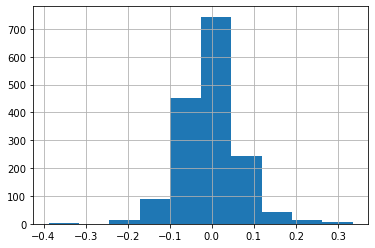

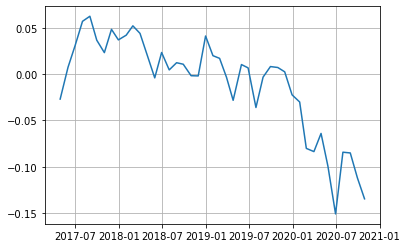

In [36]:
value_df = df[(df.per < 10) & (df.roe > 0.1)]       # 割安でクオリティが高い銘柄を抽出

plt.hist(value_df["rt"])  
plt.grid()# ヒストグラムの描画
plt.show()

balance = value_df.groupby(level=0).mean().cumsum() # 累積リターンを作成

plt.clf()
plt.grid()
plt.plot(balance["rt"])                             # バランスカーブの描画
plt.show()

In [ ]:
#earnings.to_csv('./csv/earnings_100_150.csv')